Import Libraries

In [1]:
import src.util as utils
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, ConfusionMatrixDisplay

Load Configuration File

In [2]:
config = utils.load_config()

Load Train Dataset yang sudah di balance

In [3]:
def load_train_feng(params: dict) -> pd.DataFrame:
    # Load train set
    x_train = utils.pickle_load(params["train_feng_set_path"][0])
    y_train = utils.pickle_load(params["train_feng_set_path"][1])

    return x_train, y_train

def load_valid(params: dict) -> pd.DataFrame:
    # Load valid set
    x_valid = utils.pickle_load(params["valid_feng_set_path"][0])
    y_valid = utils.pickle_load(params["valid_feng_set_path"][1])

    return x_valid, y_valid

def load_test(params: dict) -> pd.DataFrame:
    # Load tets set
    x_test = utils.pickle_load(params["test_feng_set_path"][0])
    y_test = utils.pickle_load(params["test_feng_set_path"][1])

    return x_test, y_test

In [4]:
x_train, y_train = load_train_feng(config)
x_valid, y_valid = load_valid(config)
x_test, y_test = load_test(config)

In [5]:
x_train.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000
mean,7.056138,197.125394,21479.484152,7.088768,334.292479,428.150772,14.233504,65.977483,3.971829
std,1.199744,27.458526,7952.663563,1.403651,30.580390,78.357271,3.066849,14.277681,0.736700
min,3.902476,120.101908,320.942611,3.239580,252.231330,210.319182,5.914617,28.400877,1.922377
25%,6.328553,179.548074,15417.932834,6.175570,315.180405,370.085153,12.128377,56.932455,3.453861
50%,7.036774,197.300014,20596.391231,7.076222,334.161127,425.790228,14.150363,66.179547,3.978495
75%,7.784067,215.194145,26744.301742,8.021803,352.952803,482.673327,16.333126,75.416710,4.481552
max,10.252816,273.813807,44868.458368,10.999995,413.914001,652.537592,22.686837,104.230949,5.989543


Model Training

In [6]:
models = [RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression(),xgb.XGBClassifier()]
scores = dict()

for m in models:
    m.fit(x_train, y_train)
    y_pred = m.predict(x_test)

    print(f'model: {str(m)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*30, '\n')

model: RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.68      0.71      0.70       200
         1.0       0.52      0.48      0.50       128

    accuracy                           0.62       328
   macro avg       0.60      0.60      0.60       328
weighted avg       0.62      0.62      0.62       328

------------------------------ 

model: KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.64      0.57      0.61       200
         1.0       0.43      0.50      0.46       128

    accuracy                           0.55       328
   macro avg       0.54      0.54      0.53       328
weighted avg       0.56      0.55      0.55       328

------------------------------ 

model: SVC()
              precision    recall  f1-score   support

         0.0       0.59      0.71      0.64       200
         1.0       0.33      0.22      0.26       128

    accuracy                           0.

Model Fitting Using (RFC)

In [7]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print(f'model: {str(rfc)}')
print(classification_report(y_test,y_pred, zero_division=1))

model: RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.68      0.73      0.71       200
         1.0       0.52      0.45      0.49       128

    accuracy                           0.62       328
   macro avg       0.60      0.59      0.60       328
weighted avg       0.62      0.62      0.62       328



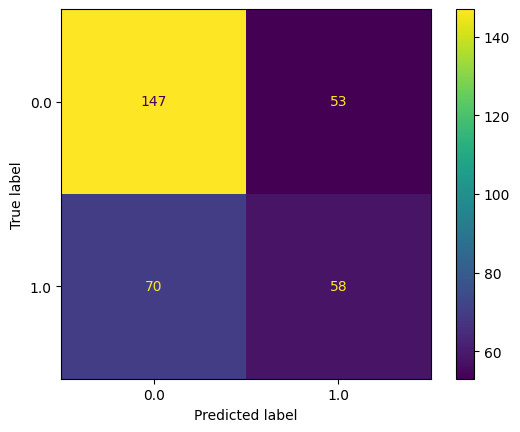

In [8]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Tuning Hyperparameter

In [9]:
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['linear']} 
rfc_Model = SVC(gamma='auto',
                random_state = 123)

In [10]:
#Setup Random Grid Search
from sklearn.model_selection import RandomizedSearchCV 
rfc_RS = RandomizedSearchCV (estimator = rfc_Model,
                              param_distributions = param_grid,
                              n_iter = 10,
                              cv = 3, 
                              verbose=2, 
                              n_jobs = -1)

In [11]:
# Lakukan Fitting Data
rfc_RS.fit(X = x_train,
           y = y_train)
y_pred = rfc.predict(x_valid)
print(classification_report(y_valid,y_pred, zero_division=1))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
              precision    recall  f1-score   support

         0.0       0.70      0.74      0.72       200
         1.0       0.56      0.50      0.53       128

    accuracy                           0.65       328
   macro avg       0.63      0.62      0.62       328
weighted avg       0.64      0.65      0.65       328



Dump Model

In [12]:
utils.pickle_dump(rfc, config["production_model_path"])
model = utils.pickle_load("models/production_model.pkl")

In [15]:
# print(valid_set.shape)
print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

(2689, 9)
(328, 9)
(328, 9)
